Ознайомитися з основними типами структур даних в Pandas (Series, DataFrame).
Навчитися обробляти та аналізувати дані за допомогою Pandas.
Опанувати базові методи візуалізації даних за допомогою Matplotlib та Seaborn.
Завантаження даних:

Ознайомтеся з доступними наборами даних в бібліотеці Seaborn (sns.load_dataset()).
Завантажте набір даних за власним вибором. Це може бути CSV файл, дані з веб-сайту або інший формат. Якщо не вдалося вибрати потрібний набір даних, то використайте "titanic" dataset - набір даних за замовчуванням.
Використовуйте pd.read_csv() для завантаження CSV файлів або sns.load_dataset() для завантаження вбудованих.

In [481]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [482]:
df = pd.read_csv("./datasets/games.csv")

# Обробка та аналіз даних у Pandas

## Створення DataFrame  
- `df = pd.read_csv('filename.csv')` – Завантаження даних з CSV-файлу.

## Перегляд перших та останніх рядків DataFrame  
- `df.head()` – Перші 5 рядків.  
- `df.tail()` – Останні 5 рядків.  

## Отримання інформації про структуру DataFrame  
- `df.info()` – Загальна інформація про DataFrame.  

## Виведення описової статистики для числових стовпців  
- `df.describe()` – Основні статистичні характеристики.  

## Вибір окремого стовпця або кількох стовпців  
- `df['column_name']` – Один стовпець.  
- `df[['col1', 'col2']]` – Декілька стовпців.  

## Фільтрація даних за умовою  
- `df[df['column_name'] > value]` – Відбір рядків за критерієм.  

## Сортування даних за певним стовпцем  
- `df.sort_values('column_name')` – Сортування за значеннями у стовпці.  

## Групування даних та обчислення агрегатних функцій  
- `df.groupby('category')['column_name'].mean()` – Обчислення середнього значення для кожної групи.  

## Додавання нового стовпця  
- `df['new_column'] = ...` – Додавання нового стовпця.  

## Видалення стовпця  
- `df.drop('column_name', axis=1)` – Видалення стовпця.  

## Перейменування стовпців  
- `df.rename(columns={'old_name': 'new_name'})` – Зміна назв стовпців.  


In [483]:
print(df.head())
print(df.tail())

                              Title Original Price Discounted Price  \
0                   Baldur's Gate 3         $29.99           $29.99   
1  Counter-Strike: Global Offensive         $14.99           $14.99   
2                     Apex Legends™           Free             Free   
3                   Forza Horizon 5         $34.78           $17.39   
4                     Call of Duty®           Free             Free   

   Release Date                                               Link  \
0   3 Aug, 2023  https://store.steampowered.com/app/1086940/Bal...   
1  21 Aug, 2012  https://store.steampowered.com/app/730/Counter...   
2   4 Nov, 2020  https://store.steampowered.com/app/1172470/Ape...   
3   8 Nov, 2021  https://store.steampowered.com/app/1551360/For...   
4  27 Oct, 2022  https://store.steampowered.com/app/1938090/Cal...   

                                    Game Description   Recent Reviews Summary  \
0  Baldur’s Gate 3 is a story-rich, party-based R...  Overwhelmingly Po

In [484]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71700 entries, 0 to 71699
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Title                   71699 non-null  object
 1   Original Price          71700 non-null  object
 2   Discounted Price        71700 non-null  object
 3   Release Date            71569 non-null  object
 4   Link                    71700 non-null  object
 5   Game Description        71489 non-null  object
 6   Recent Reviews Summary  56480 non-null  object
 7   All Reviews Summary     5371 non-null   object
 8   Recent Reviews Number   56480 non-null  object
 9   All Reviews Number      5371 non-null   object
 10  Developer               71479 non-null  object
 11  Publisher               71183 non-null  object
 12  Supported Languages     71700 non-null  object
 13  Popular Tags            71700 non-null  object
 14  Game Features           71700 non-null  object
 15  Mi

In [485]:
df.describe()

,Title,Original Price,Discounted Price,Release Date,Link,Game Description,Recent Reviews Summary,All Reviews Summary,Recent Reviews Number,All Reviews Number,Developer,Publisher,Supported Languages,Popular Tags,Game Features,Minimum Requirements
count,71699,71700,71700,71569,71700,71489,56480,5371,56480,5371,71479,71183,71700,71700,71700,70576
unique,71699,654,827,4441,71700,71090,18,7,13391,5296,45353,38543,11058,65817,5418,63201
top,Baldur's Gate 3,Free,Free,Coming soon,https://store.steampowered.com/app/1086940/Bal...,Find the objects that are hidden on the map.,Very Positive,Very Positive,- Need more user reviews to generate a score,- 90% of the 624 user reviews for this game ar...,Choice of Games,Big Fish Games,['English'],"['Indie', 'Casual']",['Single-player'],Requires a 64-bit processor and operating syst...
freq,1,17585,17585,5887,1,34,11039,3151,18999,3,162,459,38083,284,17262,274


In [486]:
df[["Title", "Game Description"]]

,Title,Game Description
0,Baldur's Gate 3,"Baldur’s Gate 3 is a story-rich, party-based R..."
1,Counter-Strike: Global Offensive,Counter-Strike: Global Offensive (CS: GO) expa...
2,Apex Legends™,"Apex Legends is the award-winning, free-to-pla..."
3,Forza Horizon 5,Your Ultimate Horizon Adventure awaits! Explor...
4,Call of Duty®,"Welcome to Call of Duty® HQ, the home of Call ..."
...,...,...
71695,The Front,The Front is a survival-open-world-crafting (S...
71696,The Bornless,"Welcome to The Bornless, an action horror FPS...."
71697,Winter Memories,After the unforgettable summer memories you’ve...
71698,Call of Duty®: Modern Warfare® III,In the direct sequel to the record-breaking Ca...


In [487]:
free_games = df[df["Original Price"] == "Free"]["Title"]
free_games

2                   Apex Legends™
4                   Call of Duty®
5             PUBG: BATTLEGROUNDS
9              NARAKA: BLADEPOINT
15                    War Thunder
                   ...           
71694                  Sunkenland
71695                   The Front
71696                The Bornless
71697             Winter Memories
71699    Pixel Gun 3D: PC Edition
Name: Title, Length: 17585, dtype: object

In [488]:
print(f"There is {free_games.count()} game free to play in dataset")

There is 17584 game free to play in dataset


In [489]:
df["Original Price"] = (
    df["Original Price"]
    .str.replace("$", "")  
    .str.replace(",", "") 
    .replace("Free", 0)  
    .astype(float) 
)

df["Discounted Price"] = (
    df["Discounted Price"]
    .str.replace("$", "")  
    .str.replace(",", "") 
    .replace("Free", 0)  
    .astype(float) 
)

df.sort_values("Original Price", ascending=False)

,Title,Original Price,Discounted Price,Release Date,Link,Game Description,Recent Reviews Summary,All Reviews Summary,Recent Reviews Number,All Reviews Number,Developer,Publisher,Supported Languages,Popular Tags,Game Features,Minimum Requirements
60721,Fright,14046333.0,4213899.9,"5 Jan, 2020",https://store.steampowered.com/app/1200630/Fri...,Move around a hauntred maze trying to find boo...,1 user reviews,NaN,- Need more user reviews to generate a score,NaN,"Strawberry Game Studios, LLC","Strawberry Game Studios, LLC",['English'],"['Indie', 'Casual', 'First-Person', 'Singlepla...",['Single-player'],OS: | Windows 8/8.1/10 | Processor: | Intel(...
52065,Roller,14046333.0,4213899.9,"18 May, 2018",https://store.steampowered.com/app/847510/Roll...,Let the colors hypnotize you in this fun fille...,NaN,NaN,NaN,NaN,Strawberry Game Studios,Strawberry Game Studios,['English'],['Casual'],['Single-player'],OS: | Windows 8 | Processor: | Intel(R) Core...
52064,Jack-O-Lantern Covers of Darkness,14046333.0,4213899.9,"14 Dec, 2019",https://store.steampowered.com/app/1193660/Jac...,The Jack-O-Lanterns have emerged from the unde...,3 user reviews,NaN,- Need more user reviews to generate a score,NaN,"Strawberry Game Studios, LLC","Strawberry Game Studios, LLC",['English'],"['Casual', 'Adventure', 'Indie', 'First-Person...",['Single-player'],OS: | Windows 7/8/10 | Processor: | Intel® C...
39897,Nomad Station,100000.0,100000.0,"15 Jul, 2023",https://store.steampowered.com/app/2386790/Nom...,"Become a master MI6 saboteur, and earn your na...",NaN,NaN,NaN,NaN,Derek Moritz,Derek Moritz,['English'],"['Space', 'Sci-fi', 'Action-Adventure', 'RPG',...","['Single-player', 'Steam Achievements', 'Track...",Requires a 64-bit processor and operating syst...
63158,Orpiment,9999.0,9999.0,"11 Oct, 2021",https://store.steampowered.com/app/1569370/Orp...,"Orpiment is a rogue-like game, based on a deck...",NaN,NaN,NaN,NaN,Yobiké,Yobiké,"['English', 'French']","['Card Battler', 'Roguelite', 'Real Time Tacti...",['Single-player'],OS: | Windows 7 (SP1+) | Processor: | 1.1 GH...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57368,Nano Citizens,0.0,0.0,To be announced,https://store.steampowered.com/app/2499120/Nan...,"Nano Citizens, the city-building game that tak...",NaN,NaN,NaN,NaN,Nullable Pandas,Nullable Pandas,['English'],"['Simulation', 'City Builder', 'Strategy', 'Im...","['Single-player', 'Steam Achievements', 'Full ...",Requires a 64-bit processor and operating syst...
57367,Upon the Eldritch Planet,0.0,0.0,To be announced,https://store.steampowered.com/app/2498970/Upo...,Upon the Eldritch Planet is a sci-fi FPS + Sur...,NaN,NaN,NaN,NaN,Niwaessence,Niwaessence,['English'],"['Action', 'Adventure', 'RPG', 'Shooter', 'Act...",['Single-player'],OS: | Windows 10 | Processor: | intel(R) Cor...
57366,GODFORSAKEN,0.0,0.0,To be announced,https://store.steampowered.com/app/2498450/GOD...,You are in a place forgotten by God. Once here...,NaN,NaN,NaN,NaN,Soulwarmers Games,Soulwarmers Games,['English'],"['Survival', 'Post-apocalyptic', 'FPS', 'PvP',...","['Single-player', 'Online PvP', 'Online Co-op']",OS: | TBA | Processor: | TBA | Graphics: | TBA
57365,The Legend of Ogorets #1: Wrat,0.0,0.0,"1 Sep, 2023",https://store.steampowered.com/app/2498350/The...,"An immersive, barebones-style interactive visu...",NaN,NaN,NaN,NaN,Anne Crawson,Anne Crawson,['English'],"['Casual', 'Simulation', 'Action-Adventure', '...",['Single-player'],OS: | Windows 11 | Processor: | 2.80 GHz 11t...


There is 3 game with price $4,213,899.90 😓😓😓

In [490]:
df.groupby('Release Date')['Original Price'].mean()

Release Date
1 Apr, 2006        2.99000
1 Apr, 2008        4.12000
1 Apr, 2013        0.00000
1 Apr, 2014        5.89000
1 Apr, 2015        5.11625
                    ...   
Sep 2020           1.39000
September 2018     0.00000
September 2023     0.00000
September 2024     0.00000
To be announced    0.00000
Name: Original Price, Length: 4441, dtype: float64

In [ ]:
import re

def extract_rating(text):
    if isinstance(text, str): 
        result = re.search(r'(\d+)%', text)
        return int(result.group(1)) if result else None
    return None 

In [492]:
df["Game rating"] = df["All Reviews Number"].map(extract_rating)
df["Game rating"]

0        94.0
1        88.0
2        80.0
3        88.0
4        57.0
         ... 
71695     NaN
71696     NaN
71697     NaN
71698     NaN
71699     NaN
Name: Game rating, Length: 71700, dtype: float64

In [493]:
df = df.drop(columns=["Link"])
df.columns

Index(['Title', 'Original Price', 'Discounted Price', 'Release Date',
       'Game Description', 'Recent Reviews Summary', 'All Reviews Summary',
       'Recent Reviews Number', 'All Reviews Number', 'Developer', 'Publisher',
       'Supported Languages', 'Popular Tags', 'Game Features',
       'Minimum Requirements', 'Game rating'],
      dtype='object')

In [494]:
df = df.rename(columns={"All Reviews Number": "All Reviews"})
df["All Reviews"].head()

0    - 94% of the 188,617 user reviews for this gam...
1    - 88% of the 7,428,921 user reviews for this g...
2    - 80% of the 701,597 user reviews for this gam...
3    - 88% of the 123,162 user reviews for this gam...
4    - 57% of the 236,876 user reviews for this gam...
Name: All Reviews, dtype: object

Matplotlib: Базова візуалізація:

Побудуйте гістограму розподілу для одного з числових стовпців (plt.hist(df['column_name'])).
Створіть точковий графік для відображення залежності між двома числовими стовпцями (plt.scatter(df['col1'], df['col2'])).
Побудуйте стовпчикову діаграму для порівняння категорій за певним показником (plt.bar(df['category'], df['value'])).
Відобразіть кругову діаграму для відображення частки кожної категорії (plt.pie(df['value'], labels=df['category'])).
Додайте підписи до осей, заголовок графіку та легенду (plt.xlabel(), plt.ylabel(), plt.title(), plt.legend()).
Збережіть графік у файл (plt.savefig('plot.png')).

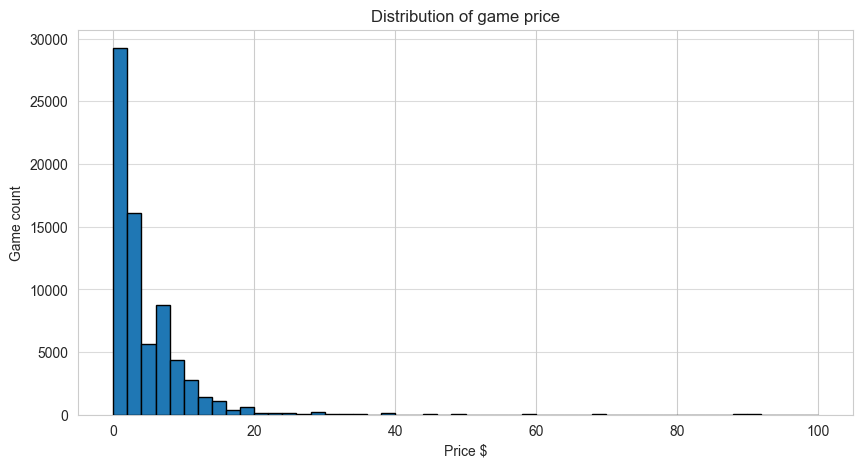

In [495]:

df_filtered = df[df['Original Price'] <= 100]

plt.figure(figsize=(10, 5))
plt.hist(df_filtered['Original Price'].astype(int), bins=50, edgecolor='black', zorder=3)
plt.xlabel('Price $')
plt.ylabel('Game count')
plt.title('Distribution of game price')
plt.grid(axis='y', alpha=0.7)
plt.show()

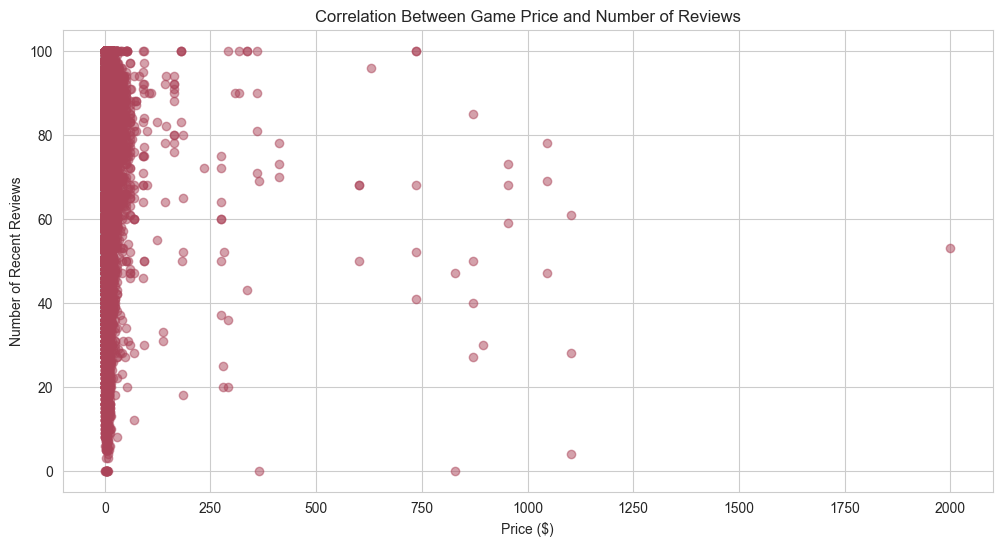

In [496]:
df['Recent Reviews Number'] = df['Recent Reviews Number'].str.extract(r'(\d[\d,]*)')[0]
df['Recent Reviews Number'] = df['Recent Reviews Number'].str.replace(',', '').astype(float)

plt.figure(figsize=(12, 6)) 
plt.scatter(df['Original Price'], df['Recent Reviews Number'], alpha=0.5, c="#AB4459")
plt.xlabel('Price ($)')
plt.ylabel('Number of Recent Reviews')
plt.title('Correlation Between Game Price and Number of Reviews')
plt.show()


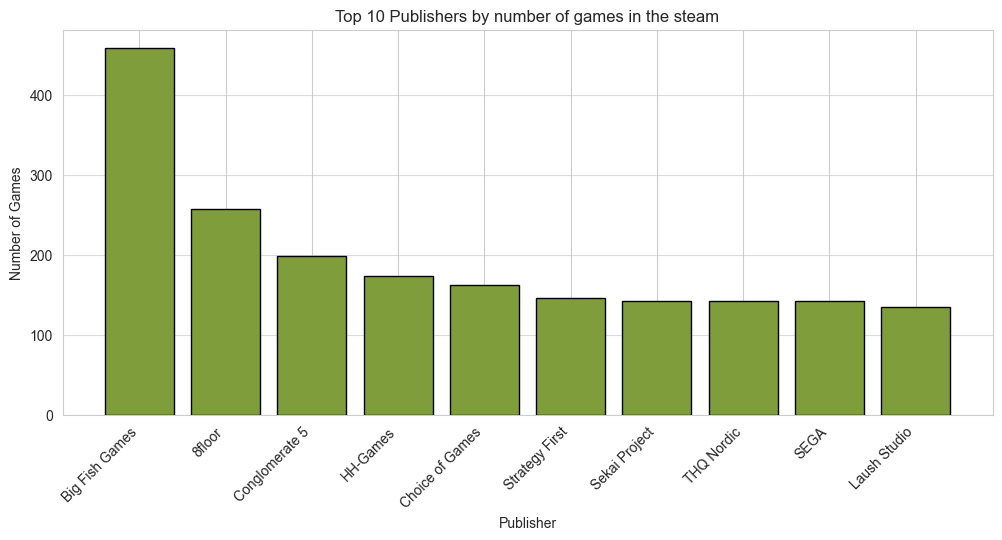

In [497]:
top_publishers = df['Publisher'].value_counts().head(10)

plt.figure(figsize=(12, 5))
plt.bar(top_publishers.index, top_publishers.values, color='#809D3C', edgecolor='black', zorder=3)
plt.xlabel('Publisher')
plt.ylabel('Number of Games')
plt.title('Top 10 Publishers by number of games in the steam')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.7)
plt.show()


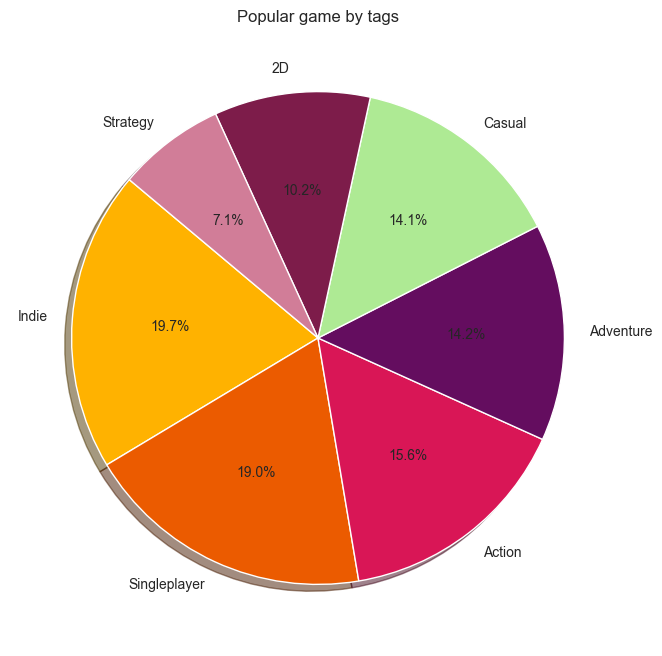

In [498]:
colors = ["#FFB200", "#EB5B00", "#D91656", "#640D5F", "#AEEA94", "#7D1C4A", "#D17D98"]
tag_series = df['Popular Tags'].dropna().str.replace(r"[\[\]']", '', regex=True).str.split(', ').explode()

top_tags = tag_series.value_counts().head(7)

plt.figure(figsize=(8, 8))
plt.pie(top_tags.values, labels=top_tags.index, autopct='%1.1f%%', startangle=140, shadow=True, colors=colors)
plt.title('Popular game by tags')
plt.show()



# Seaborn: Розширена візуалізація

Використовуйте **Seaborn** для створення більш інформативних та естетично привабливих графіків.

## Графіки розподілу
- Побудуйте графік розподілу за допомогою `sns.displot()` або `sns.kdeplot()`.

## Залежність між змінними
- Відобразіть залежність між змінними за допомогою `sns.relplot()` або `sns.scatterplot()`.

## Категорійні графіки
- Використовуйте `sns.catplot()`, `sns.boxplot()`, `sns.violinplot()` для порівняння категорій.

## Теплова карта кореляції
- Побудуйте теплову карту для відображення кореляції між змінними за допомогою `sns.heatmap()`.

## Використання FacetGrid
- Використовуйте `FacetGrid` для побудови графіків за категоріями.

## Покращення стилю графіків
- Застосуйте різні стилі Seaborn для покращення зовнішнього вигляду графіків за допомогою `sns.set_style()`.


In [499]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71700 entries, 0 to 71699
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Title                   71699 non-null  object 
 1   Original Price          71700 non-null  float64
 2   Discounted Price        71700 non-null  float64
 3   Release Date            71569 non-null  object 
 4   Game Description        71489 non-null  object 
 5   Recent Reviews Summary  56480 non-null  object 
 6   All Reviews Summary     5371 non-null   object 
 7   Recent Reviews Number   37481 non-null  float64
 8   All Reviews             5371 non-null   object 
 9   Developer               71479 non-null  object 
 10  Publisher               71183 non-null  object 
 11  Supported Languages     71700 non-null  object 
 12  Popular Tags            71700 non-null  object 
 13  Game Features           71700 non-null  object 
 14  Minimum Requirements    70576 non-null

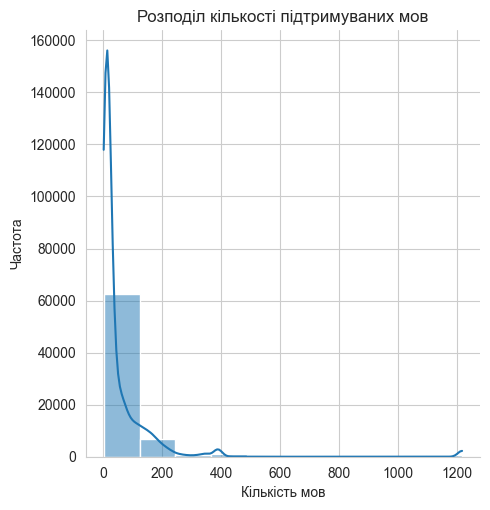

In [500]:
df['num_languages'] = df['Supported Languages'].apply(len)

sns.displot(df['num_languages'], kde=True, bins=10)

plt.xlabel("Кількість мов")
plt.ylabel("Частота")
plt.title("Розподіл кількості підтримуваних мов")
plt.show()


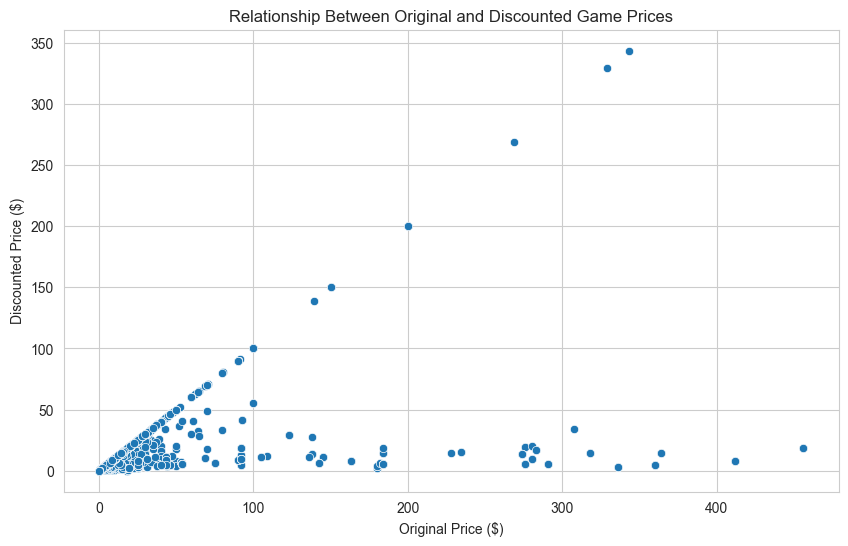

In [501]:
df = df[(df['Original Price'] <= 500) & (df['Discounted Price'] <= 500)]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="Original Price", y="Discounted Price")

plt.xlabel("Original Price ($)")
plt.ylabel("Discounted Price ($)")
plt.title("Relationship Between Original and Discounted Game Prices")

plt.show()

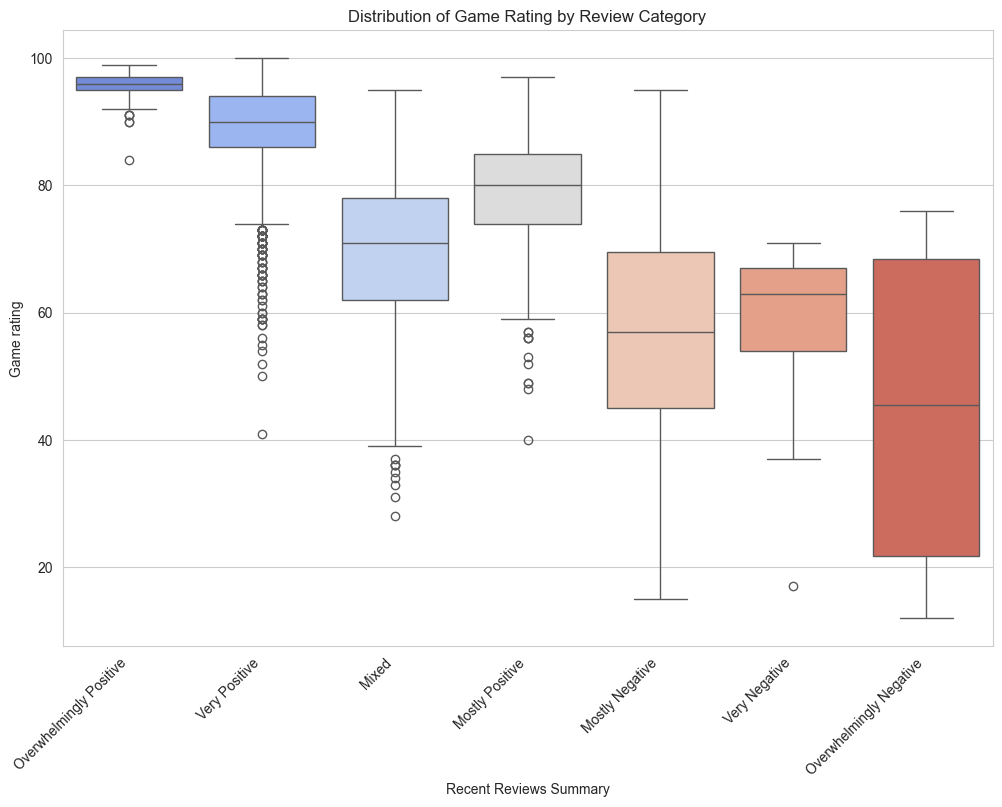

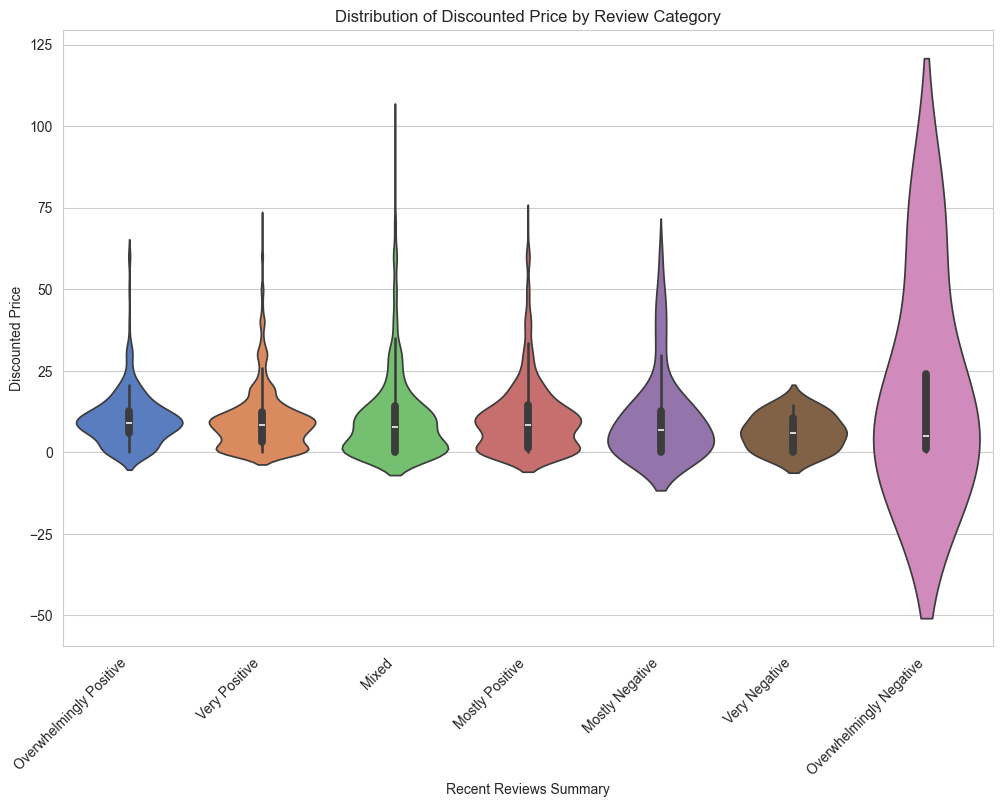

In [502]:
df = df.dropna(subset=["Original Price", "Discounted Price", "Recent Reviews Summary", "Game rating"])

plt.figure(figsize=(12, 8))
sns.boxplot(x="Recent Reviews Summary", y="Game rating", data=df, palette="coolwarm", hue="Recent Reviews Summary")
plt.title("Distribution of Game Rating by Review Category")
plt.xticks(rotation=45, ha='right')

plt.show()

plt.figure(figsize=(12, 8))
sns.violinplot(x="Recent Reviews Summary", y="Discounted Price", data=df, palette="muted", hue="Recent Reviews Summary")
plt.title("Distribution of Discounted Price by Review Category")
plt.xticks(rotation=45, ha='right')

plt.show()

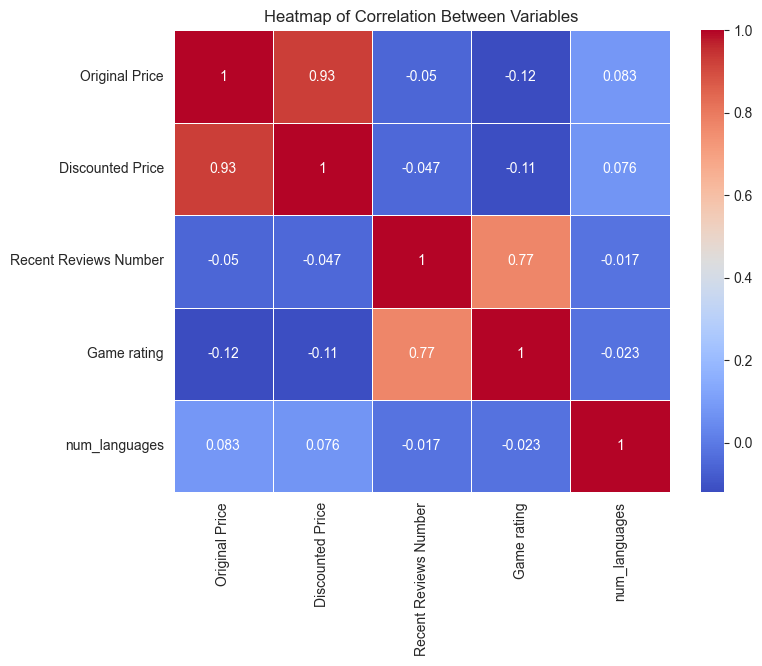

In [503]:
corr_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Heatmap of Correlation Between Variables")

plt.show()

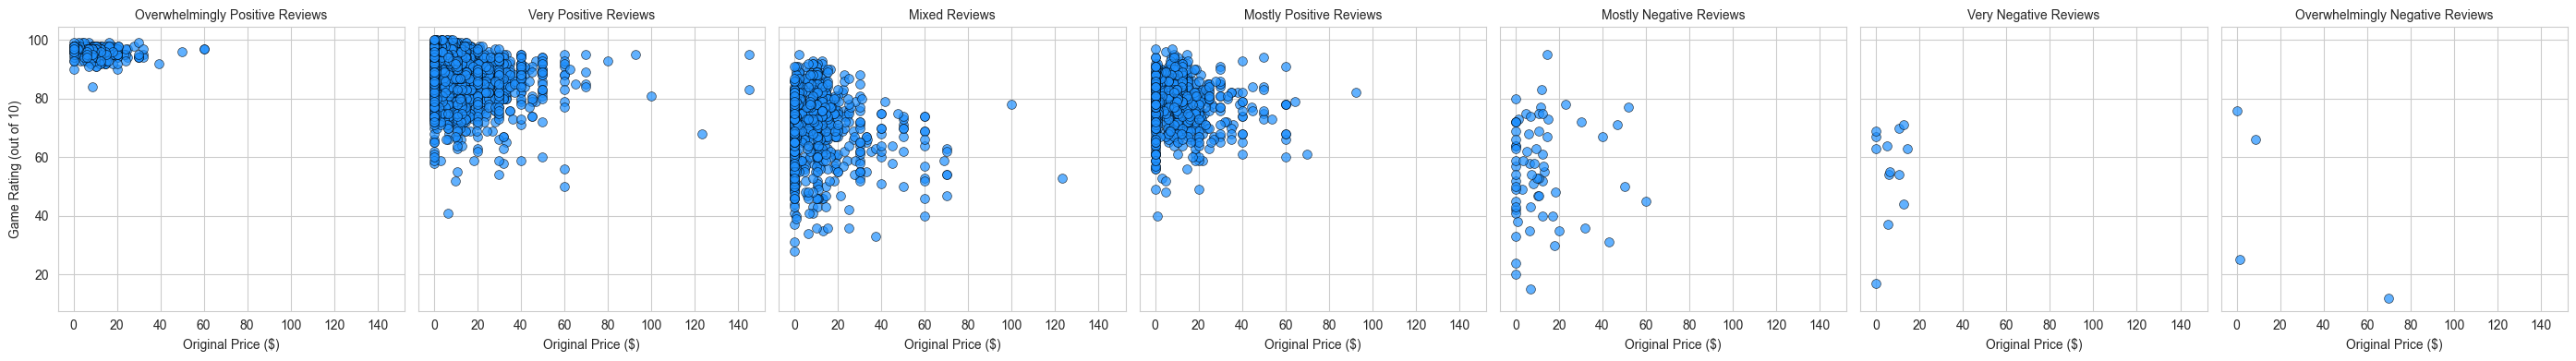

In [504]:
sns.set_style("whitegrid") 

grid = sns.FacetGrid(df, col="Recent Reviews Summary", height=4, aspect=1, despine=False)

grid.map_dataframe(
    sns.scatterplot, 
    x="Original Price", 
    y="Game rating", 
    alpha=0.7, 
    edgecolor="black", 
    linewidth=0.5,
    s=50,
    color="dodgerblue"
)

grid.set_axis_labels("Original Price ($)", "Game Rating (out of 10)")
grid.set_titles(col_template="{col_name} Reviews")

plt.show()
